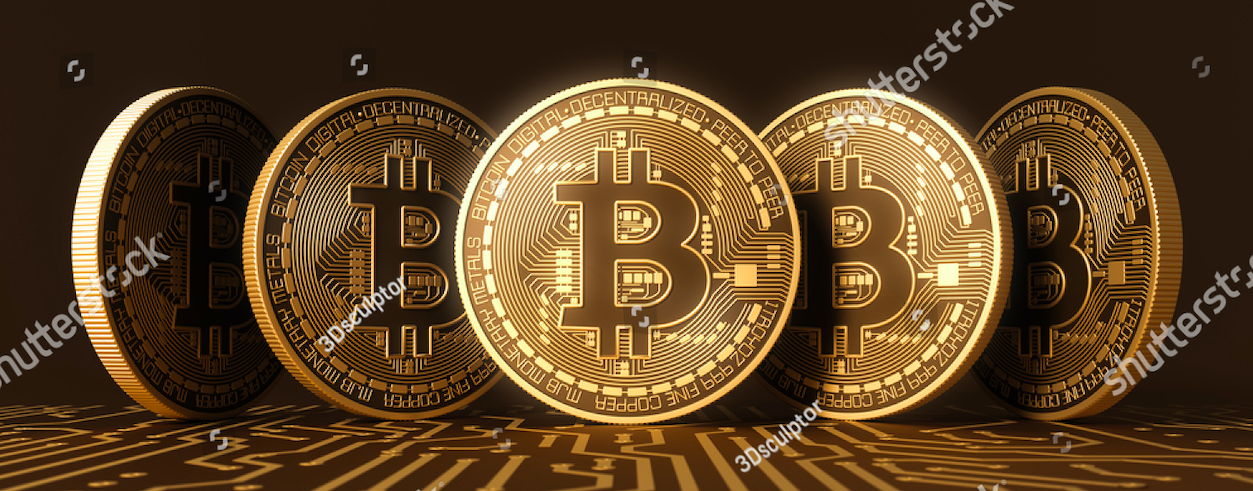

In [1]:
from IPython.display import Image
Image(filename='bitcoin.png')

### Importing the necessary libraries 

In [2]:
import datetime as dt # for converting the dtype of dates in datetime objects 
import numpy as np # for creating nd array objects
import pandas as pd # for data cleansing
import matplotlib.pyplot as plt # for data exploration
import seaborn as sns # for visulisation 
%matplotlib inline
# for data preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
# for modelling 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Reading the data file using pandas
data_1 = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')
data_2 = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [4]:
print("Sample of our Data Set")
data_1.head(4)

Sample of our Data Set


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_1.tail(4)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3997693,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889
3997696,1565568000,11527.44,11551.57,11520.00,11520.00,23.805939,274731.256920,11540.450291


### Metadata

In [1]:
print(data_1.info(null_counts=True))
print(data_2.info(null_counts=True))

NameError: name 'data_1' is not defined

In [7]:
print('Data_1 - Rows {rows} and Columns {columns}'.format(rows=data_1.shape[0],columns=data_1.shape[1]))
print('Data_2 - Rows {rows} and Columns {columns}'.format(rows=data_2.shape[0],columns=data_2.shape[1]))

Data_1 - Rows 3997697 and Columns 8
Data_2 - Rows 2099760 and Columns 8


## Cleaning Data

### Problem

Data doesn't have proper format
* the dtype of column 'Timestamp' is int 

In [8]:
print("---------- Data_1 ----------")
print(data_1.dtypes)
print("---------- Data_2 ----------")
print(data_2.dtypes)

---------- Data_1 ----------
Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object
---------- Data_2 ----------
Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object


### repersentation of missing data

- Here yellow bars represents the null values(missing values).
- We can use estimated statistical values of available data of to fill the missing values (mean,median or mode).




### Data set contains a lot of NaN (null values)

In [9]:
data_1.apply(lambda X:sum(X.isnull()))
data_2.apply(lambda X:sum(X.isnull()))

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

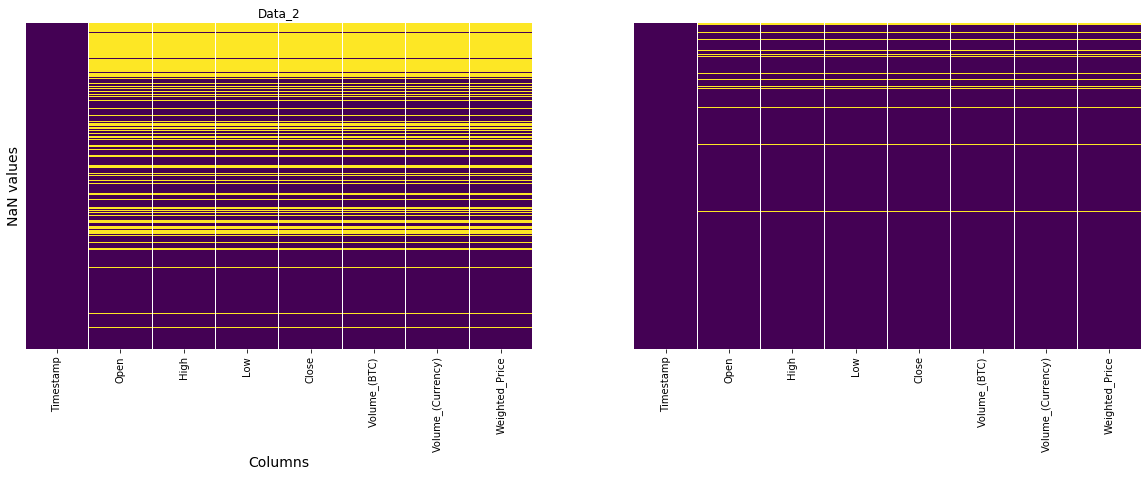

In [10]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
bar=sns.heatmap(data_1.isnull(),cmap='viridis',yticklabels=False,cbar=False)
bar.set_title('Data_1')
bar.set_xlabel('Columns',fontsize=14)
bar.set_ylabel('NaN values',fontsize=14)
plt.subplot(1,2,2)
sns.heatmap(data_2.isnull(),cmap='viridis',yticklabels=False,cbar=False)
bar.set_title('Data_2')
bar.set_xlabel('Columns',fontsize=14)
bar.set_ylabel('NaN values',fontsize=14)
plt.show()

### Converting the dtype of column 'Timestamp' to Datetime 

In [11]:
data_1["Timestamp"]=pd.to_datetime(data_1["Timestamp"],unit="s")   
data_2["Timestamp"]=pd.to_datetime(data_2["Timestamp"],unit="s") 

### Filling missing values

In [12]:
# Filling NaN values in Data Set 1
data_1['Open'].fillna(data_1['Open'].mean(),inplace=True)
data_1['High'].fillna(data_1['High'].mean(),inplace=True)
data_1['Low'].fillna(data_1['Low'].mean(),inplace=True)
data_1['Close'].fillna(data_1['Close'].mean(),inplace=True)
data_1['Volume_(BTC)'].fillna(data_1['Volume_(BTC)'].mean(),inplace=True)
data_1['Volume_(Currency)'].fillna(data_1['Volume_(Currency)'].mean(),inplace=True)
data_1['Weighted_Price'].fillna(data_1['Weighted_Price'].mean(),inplace=True)
# Filling NaN values in Data Set 2
data_2['Open'].fillna(data_2['Open'].mean(),inplace=True)
data_2['High'].fillna(data_2['High'].mean(),inplace=True)
data_2['Low'].fillna(data_2['Low'].mean(),inplace=True)
data_2['Close'].fillna(data_2['Close'].mean(),inplace=True)
data_2['Volume_(BTC)'].fillna(data_2['Volume_(BTC)'].mean(),inplace=True)
data_2['Volume_(Currency)'].fillna(data_2['Volume_(Currency)'].mean(),inplace=True)
data_2['Weighted_Price'].fillna(data_2['Weighted_Price'].mean(),inplace=True)

## EDA (EXPLORATORY DATA ANALYTICS)

In [13]:
df1=data_1
df2=data_2
df1.index = df1.Timestamp
df2.index = df2.Timestamp
df1 = df1.resample('M').mean()
df2 = df2.resample('M').mean()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


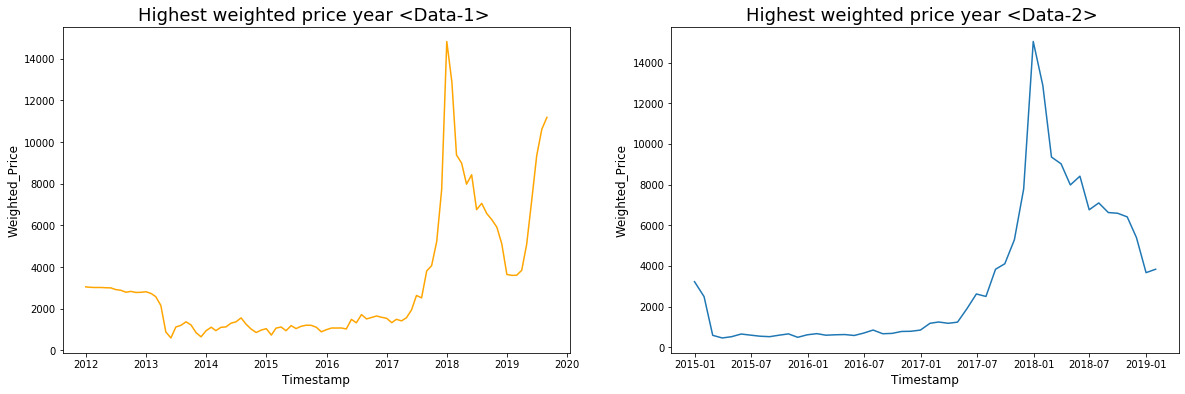

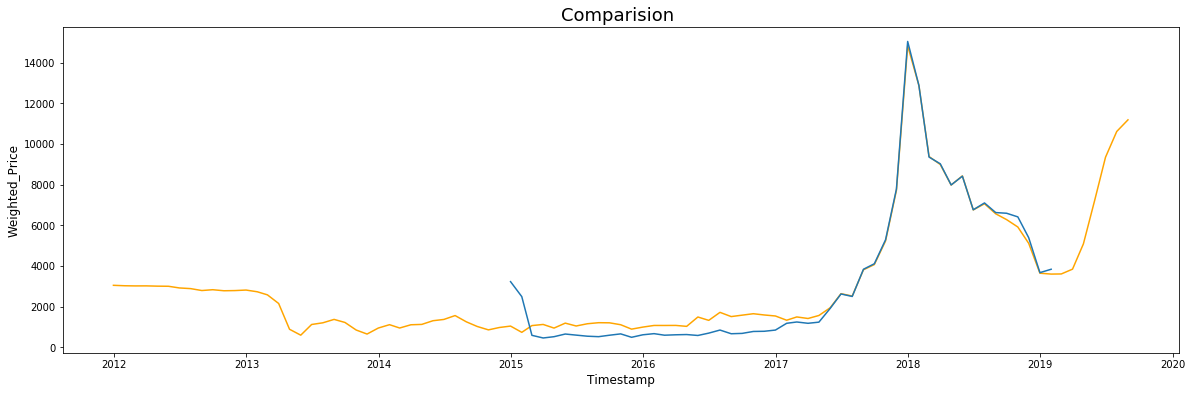

In [14]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
plt.title('Highest weighted price year <Data-1> ',fontsize=18)
plt.xlabel('Timestamp',fontsize=12)
plt.ylabel('Weighted_Price',fontsize=12)
sns.lineplot(x = df1.index, y = df1.Weighted_Price,color='orange')
plt.subplot(1,2,2)
plt.title('Highest weighted price year <Data-2> ',fontsize=18)
plt.xlabel('Timestamp',fontsize=12)
plt.ylabel('Weighted_Price',fontsize=12)
sns.lineplot(x = df2.index, y = df2.Weighted_Price)

plt.figure(figsize=(20,6))
plt.title('Comparision ',fontsize=18)
plt.xlabel('Timestamp',fontsize=12)
plt.ylabel('Weighted_Price',fontsize=12)
sns.lineplot(x = df1.index, y = df1.Weighted_Price,color='orange')
sns.lineplot(x = df2.index, y = df2.Weighted_Price)
plt.show()

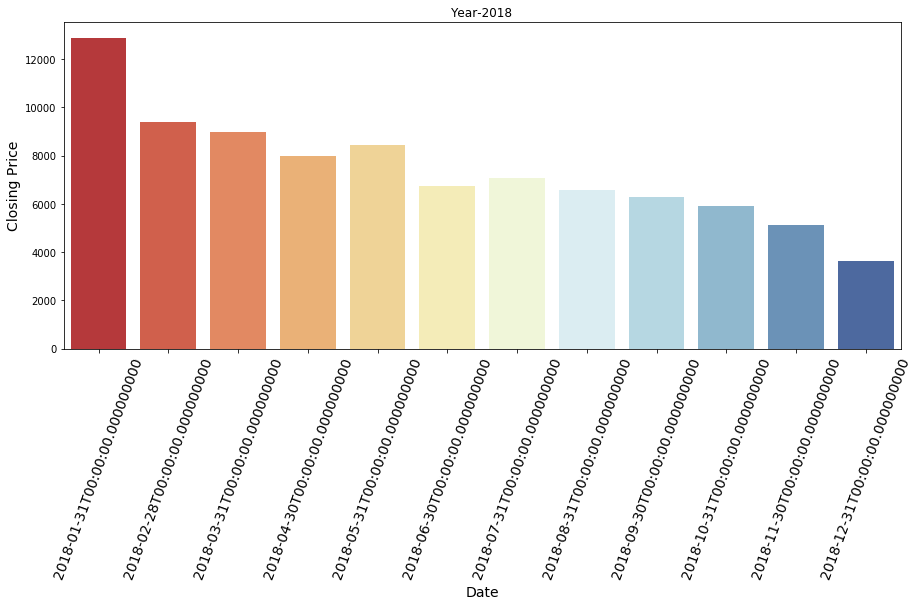

In [15]:
plt.figure(figsize=(15,6))
df_2018=df1['2018']
bar=sns.barplot(x=df_2018.index,y=df_2018.Close,palette='RdYlBu')
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)
bar.set_title('Year-2018')
bar.set_xlabel('Date',fontsize=14)
bar.set_ylabel('Closing Price',fontsize=14)
plt.show()

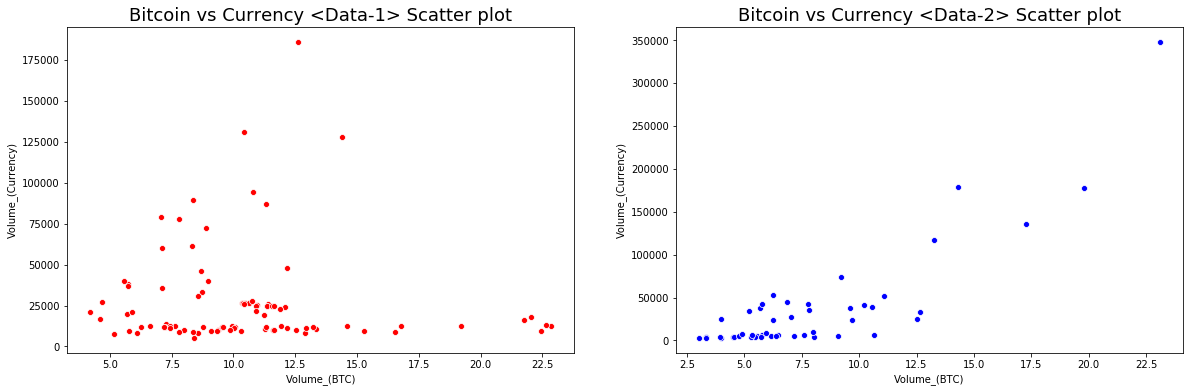

In [16]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
plt.title('Bitcoin vs Currency <Data-1> Scatter plot',fontsize=18)
sns.scatterplot(x='Volume_(BTC)', y='Volume_(Currency)',data=df1,color='red')
plt.subplot(1,2,2)
plt.title('Bitcoin vs Currency <Data-2> Scatter plot',fontsize=18)
sns.scatterplot(x='Volume_(BTC)', y='Volume_(Currency)',data=df2,color='blue')

[Text(0, 0, '2017-11-30T00:00:00.000000000'),
 Text(0, 0, '2017-12-31T00:00:00.000000000'),
 Text(0, 0, '2018-01-31T00:00:00.000000000'),
 Text(0, 0, '2018-02-28T00:00:00.000000000'),
 Text(0, 0, '2018-03-31T00:00:00.000000000'),
 Text(0, 0, '2018-04-30T00:00:00.000000000'),
 Text(0, 0, '2018-05-31T00:00:00.000000000'),
 Text(0, 0, '2018-06-30T00:00:00.000000000'),
 Text(0, 0, '2018-07-31T00:00:00.000000000'),
 Text(0, 0, '2018-08-31T00:00:00.000000000')]

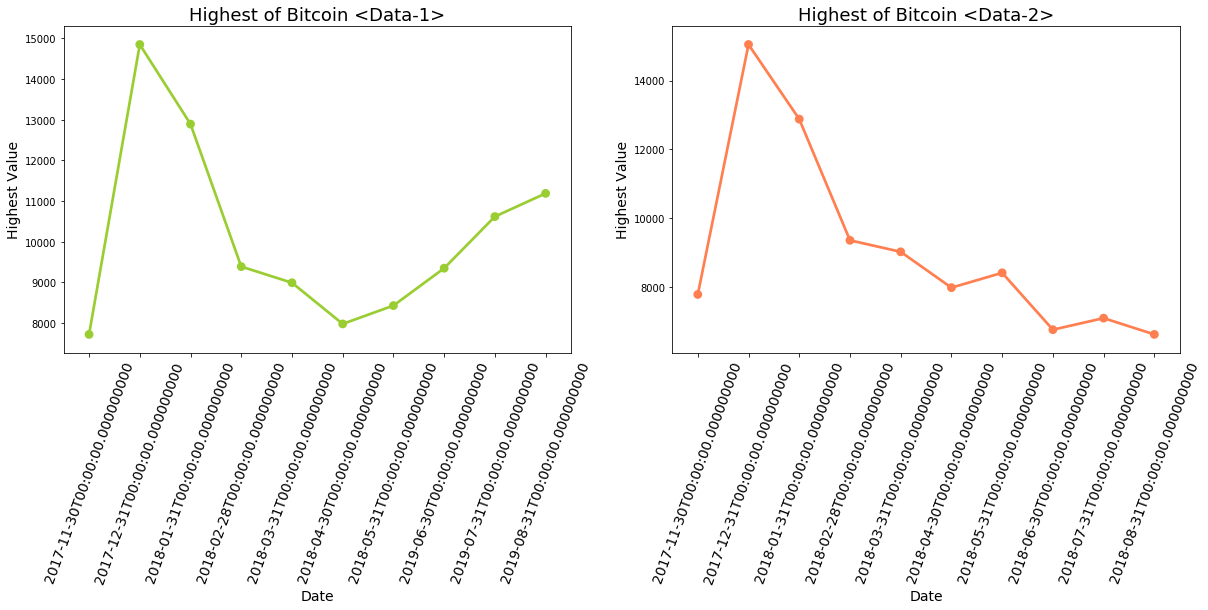

In [17]:
high_df=df1.sort_values(by=['High'],ascending=False).head(10)
high_df_2=df2.sort_values(by=['High'],ascending=False).head(10)


plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
plt.title('Highest of Bitcoin <Data-1>',fontsize=18)
bar= sns.pointplot(x = high_df.index, y = high_df.High,color='yellowgreen')
bar.set_xlabel("Date", fontsize=14)
bar.set_ylabel('Highest Value',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)

plt.subplot(1,2,2)
plt.title('Highest of Bitcoin <Data-2>',fontsize=18)
bar= sns.pointplot(x = high_df_2.index, y = high_df_2.High,color='coral')
bar.set_xlabel("Date", fontsize=14)
bar.set_ylabel('Highest Value',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)

[Text(0, 0, '2015-02-28T00:00:00.000000000'),
 Text(0, 0, '2015-03-31T00:00:00.000000000'),
 Text(0, 0, '2015-04-30T00:00:00.000000000'),
 Text(0, 0, '2015-06-30T00:00:00.000000000'),
 Text(0, 0, '2015-07-31T00:00:00.000000000'),
 Text(0, 0, '2015-08-31T00:00:00.000000000'),
 Text(0, 0, '2015-09-30T00:00:00.000000000'),
 Text(0, 0, '2015-11-30T00:00:00.000000000'),
 Text(0, 0, '2016-02-29T00:00:00.000000000'),
 Text(0, 0, '2016-05-31T00:00:00.000000000')]

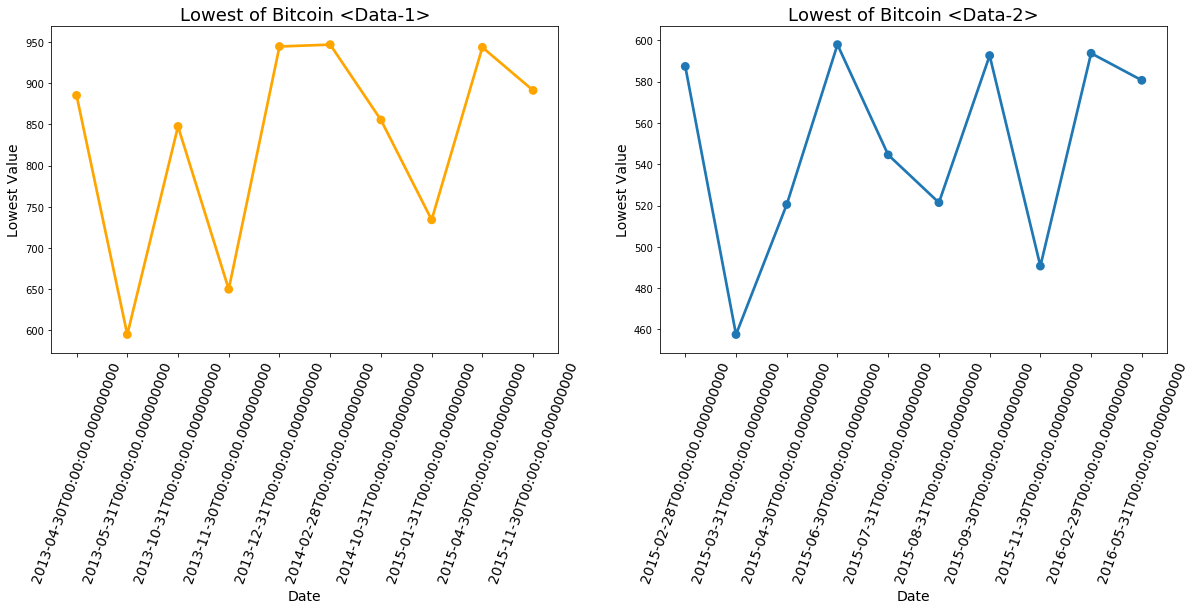

In [18]:
low_df=df1.sort_values(by=['Low'],ascending=True).head(10)
low_df_2=df2.sort_values(by=['Low'],ascending=True).head(10)

plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace = .2)
plt.subplot(1,2,1)
plt.title('Lowest of Bitcoin <Data-1>',fontsize=18)
bar = sns.pointplot(x = low_df.index, y = low_df.Low,color='orange')
bar.set_xlabel("Date", fontsize=14)
bar.set_ylabel('Lowest Value',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)

plt.subplot(1,2,2)
plt.title('Lowest of Bitcoin <Data-2>',fontsize=18)
bar = sns.pointplot(x = low_df_2.index, y = low_df_2.Low)
bar.set_xlabel("Date", fontsize=14)
bar.set_ylabel('Lowest Value',fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=70,fontsize=14)

## Modelling

### Data preprocessing

In [19]:
df=data_1
df['Timestamp']=df['Timestamp'].map(dt.datetime.toordinal)

In [20]:
x=df['Timestamp'].values
y=df['Close'].values
x=x.reshape(-1,1)

In [21]:
# splitting the data into training and testing set
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

### Standardization of data

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

0.2796860595206958


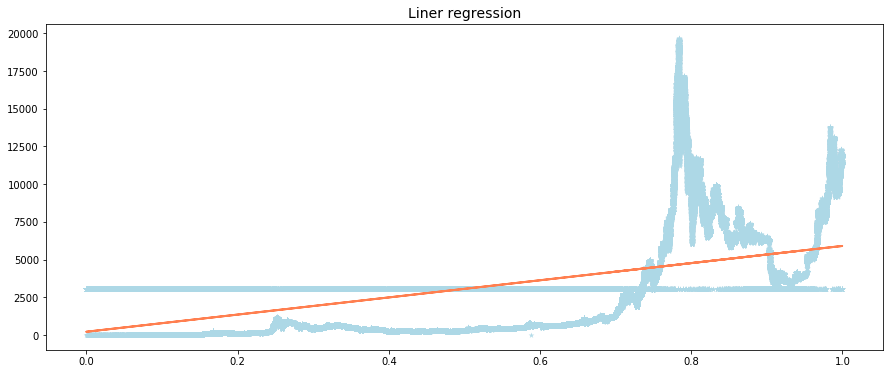

In [23]:
# Linear Regression 
plt.figure(figsize=(15,6))
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain,ytrain)
ypred = linear_regressor.predict(xtest)
lin_ac=linear_regressor.score(xtest,ytest)
print(lin_ac)
plt.title('Liner regression',fontsize=14)
plt.scatter(xtest, ytest,marker='*',linewidth=0,color='lightblue',alpha=0.9)
plt.plot(xtest, ypred, color='coral', linewidth=2)
plt.show()

r squared value is :  0.2796860595206958


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


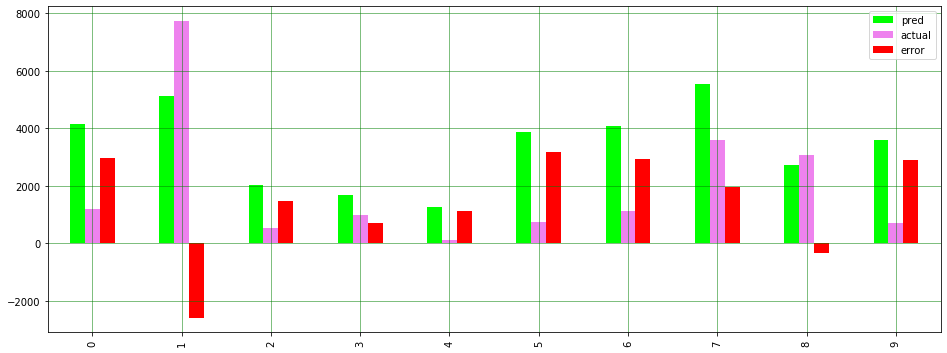

In [24]:
results = pd.DataFrame({'pred':ypred,'actual':ytest})
results['error'] = results.pred - results.actual
results_10 = results.head(10)
print('r squared value is : ',lin_ac)
results_10.plot(kind='bar',figsize=(16,6),colors=['lime','violet','red'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)
X_poly = poly_regressor.fit_transform(x)
poly_regressor.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
poly_ac=lin_reg.score(X_poly,y)
print('r squared value is : ',poly_ac)

r squared value is :  0.497097706455312


In [26]:
# Decision tree 
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(xtrain,ytrain)
y_pred = tree_regressor.predict(xtest)
tree_ac = tree_regressor.score(xtest,ytest)
print('r squared value is : ',tree_ac)

r squared value is :  0.9139309562582619


In [27]:
# comparision of models
Models = ['Linear Regression','Polynomial Regression','Decision Tree']
Accuracy = []

score = [lin_ac ,poly_ac, tree_ac]

for i in score :
    Accuracy.append(round(i*100))

In [28]:
Performance_of_Models = pd.DataFrame({'Model' : Models , 'Score' : Accuracy}).sort_values(by='Score', ascending=False)

In [29]:
Performance_of_Models

,Model,Score
2,Decision Tree,91.0
1,Polynomial Regression,50.0
0,Linear Regression,28.0


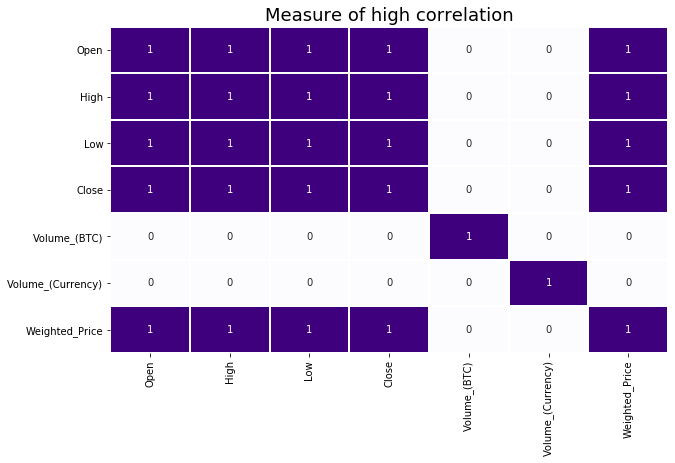

In [30]:
plt.figure(figsize=(10,6))
plt.title('Measure of high correlation',fontsize=18)
sns.heatmap(cbar=False,annot=True,data=df1.corr()>0.95,cmap='Purples',linewidths=1)

* Here we can see there are two colors (purple and white).
* The purple one are having high positive correlation.
* We will take Open,High,Low for the upcomming measurements becuase Close is the target variable so we need to avoid that.
* We will train our model with these three features because they are having higher correlation with our target variable.

## Linear regression with highly correlated features

In [31]:
x=df[['Open','High','Low']].values
y=df['Close'].values
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain,ytrain)
ypred = linear_regressor.predict(xtest)
score=linear_regressor.score(xtest,ytest)
print('Linear regression score with most correlated features : ',score)

Linear regression score with most correlated features :  0.9999984905682363


In [32]:
results = pd.DataFrame({'pred':ypred,'actual':ytest})
results['error'] = results.pred - results.actual

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


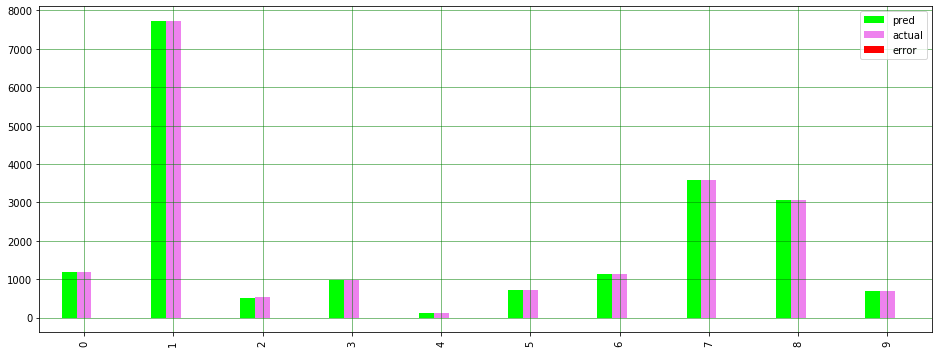

In [33]:
results_10 = results.head(10)
results_10.plot(kind='bar',figsize=(16,6),colors=['lime','violet','red'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

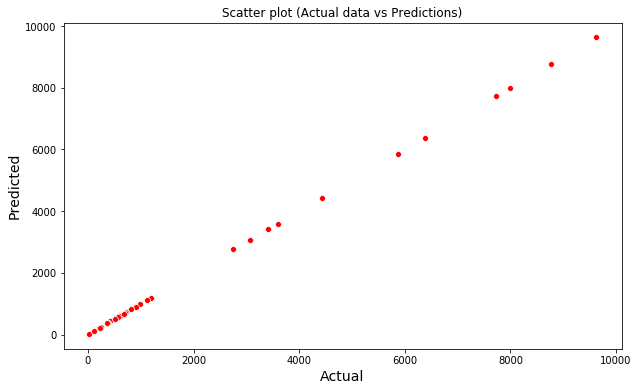

In [34]:
l=results.head(50)
plt.figure(figsize=(10,6))
bar=sns.scatterplot(x='actual',y='pred',data=l,color='red')
bar.set_title('Scatter plot (Actual data vs Predictions)')
bar.set_xlabel('Actual',fontsize=14)
bar.set_ylabel('Predicted',fontsize=14)
plt.show()

## Results 

In [35]:
results.head(21)

,pred,actual,error
0,1191.715334,1192.240000,-0.524666
1,7722.751898,7722.710000,0.041898
2,521.767257,522.790000,-1.022743
3,974.485571,976.000000,-1.514429
4,109.248862,109.310000,-0.061138
5,728.150094,728.190000,-0.039906
6,1125.694967,1125.830000,-0.135033
7,3593.004248,3592.420000,0.584248
8,3059.639127,3059.637962,0.001165
9,693.226805,693.480000,-0.253195


When we fitted our model with the feature those are highly correlated with our target variable, we got much better accuracy.